<a href="https://colab.research.google.com/github/oguzerkara/classificationWithSVM/blob/main/ImagingPhysics_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM Classification Approach on Penguin Dataset


The dataset is: from Kaggle web page
https://www.kaggle.com/datasets/larsen0966/penguins


In [ ]:
# Packages for analysing
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visualising
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/penguins.csv.xls', sep=',')

In [ ]:
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
Samplesize = 4
print(df.groupby('species', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:]))

       Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0 87           88     Adelie      Dream            36.9           18.6   
  76           77     Adelie  Torgersen            40.9           16.8   
  22           23     Adelie     Biscoe            35.9           19.2   
  35           36     Adelie      Dream            39.2           21.1   
1 314         315  Chinstrap      Dream            46.9           16.6   
  290         291  Chinstrap      Dream            45.9           17.1   
  301         302  Chinstrap      Dream            52.0           19.0   
  279         280  Chinstrap      Dream            45.4           18.7   
2 239         240     Gentoo     Biscoe            51.3           14.2   
  219         220     Gentoo     Biscoe            49.5           16.2   
  228         229     Gentoo     Biscoe            47.5           14.2   
  181         182     Gentoo     Biscoe            50.0           15.3   

       flipper_length_mm  body_mass_g

In [ ]:
print(df.groupby('sex', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:]))

       Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0 90           91     Adelie      Dream            35.7           18.0   
  330         331  Chinstrap      Dream            42.5           17.3   
  325         326  Chinstrap      Dream            49.8           17.3   
  98           99     Adelie      Dream            33.1           16.1   
1 67           68     Adelie     Biscoe            41.1           19.1   
  253         254     Gentoo     Biscoe            55.9           17.0   
  0             1     Adelie  Torgersen            39.1           18.7   
  231         232     Gentoo     Biscoe            45.2           16.4   

       flipper_length_mm  body_mass_g     sex  year  
0 90               202.0       3550.0  female  2008  
  330              187.0       3350.0  female  2009  
  325              198.0       3675.0  female  2009  
  98               178.0       2900.0  female  2008  
1 67               188.0       4100.0    male  2008  
  253    

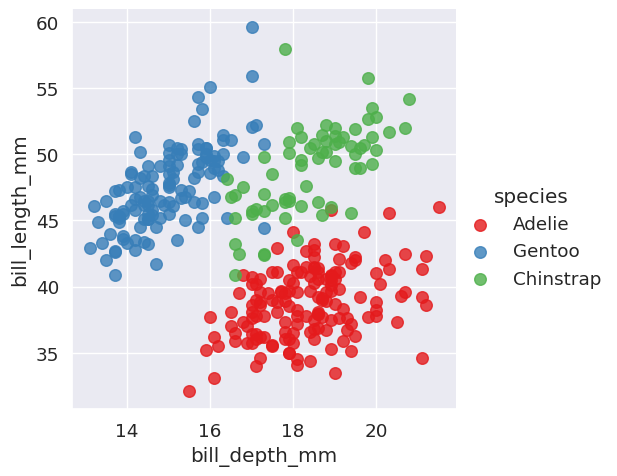

In [ ]:
sns.lmplot(x='bill_depth_mm', y='bill_length_mm', data=df, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [ ]:
# Identify the type to exclude
type_to_exclude = 'Chinstrap'

# Create the logical condition
condition = df['species'] != type_to_exclude

# Filter the dataset
filtered_data = df[condition]

# Drop NaN or None or -Inf values
filtered_data = filtered_data.dropna()

# Print the filtered dataset
print(filtered_data)

     Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0             1  Adelie  Torgersen            39.1           18.7   
1             2  Adelie  Torgersen            39.5           17.4   
2             3  Adelie  Torgersen            40.3           18.0   
4             5  Adelie  Torgersen            36.7           19.3   
5             6  Adelie  Torgersen            39.3           20.6   
..          ...     ...        ...             ...            ...   
270         271  Gentoo     Biscoe            47.2           13.7   
272         273  Gentoo     Biscoe            46.8           14.3   
273         274  Gentoo     Biscoe            50.4           15.7   
274         275  Gentoo     Biscoe            45.2           14.8   
275         276  Gentoo     Biscoe            49.9           16.1   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2              

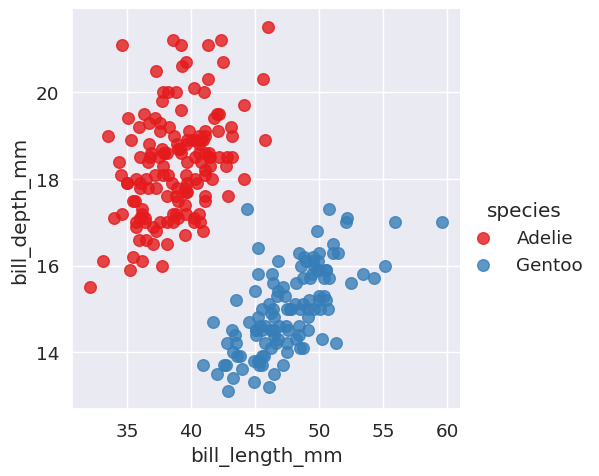

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=filtered_data, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [ ]:
features = filtered_data[['bill_length_mm', 'bill_depth_mm']].values
species_label = np.where(filtered_data['species']=='Adelie', 0,1)

# Feature names
all_features = filtered_data.columns.values[1:].tolist()
all_features

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

 For simplicity on visualisation, i.e. 2D plotting, only 2 features will be shown, instead of `all_features`


In [ ]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(features, species_label)

SVC(kernel='linear')

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

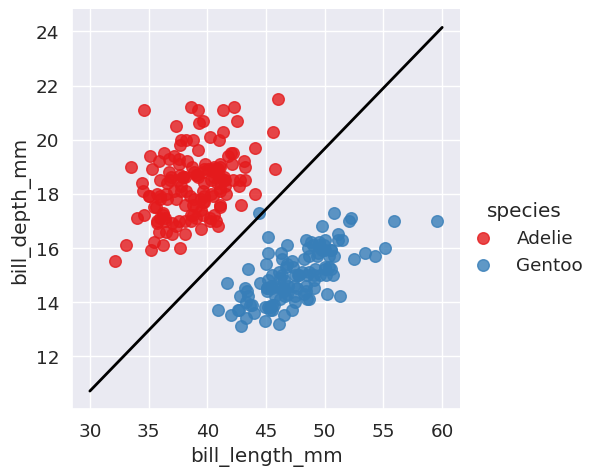

In [ ]:
# Plot the hyperplane
sns.lmplot(x='bill_length_mm', y='bill_depth_mm',
           data=filtered_data,
           hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

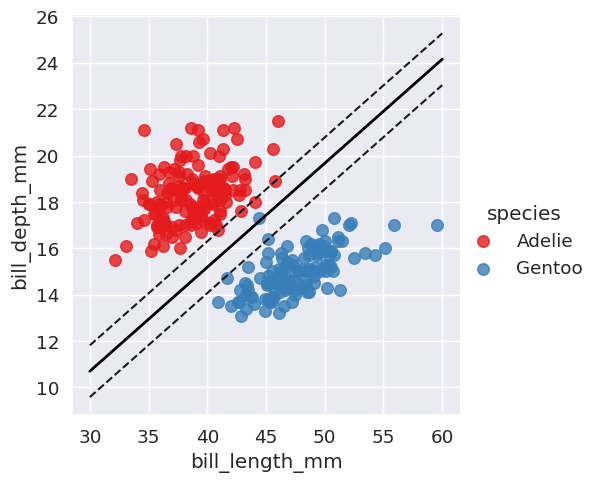

In [ ]:
# Look at the margins and support vectors
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=filtered_data, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

> **Note:** There is this `C Parameter` that allows us to make some misclassification. For instance the Gentoo guy in the middle of the `Margins` or (~44, ~17) on the map is misclassified. Here C parameter is by default `C=1` under `model.SVC()`method. Here C in SVC is reffered to "Classifier"

In [ ]:
def which_specie(bill_length, bill_depth):
  if(model.predict([[bill_length, bill_depth]])) == 0:
    print('That\'s an Adelie Penguin')
  else:
    print('That\'s a Gentoo Penguin')

In [ ]:
which_specie(50,20)

That's an Adelie Penguin


## Soft Margin and Hard Margin

By changing value of C parameter we can change the priority of our classification. Soft Margin is mostly used in the real life applications.

To give the soft margin example here:

In [ ]:
# Fit the SVM model & Change C parameter to Lower value
model = svm.SVC(kernel='linear', C=2**-5) # Soft Margin
model.fit(features, species_label)

SVC(C=0.03125, kernel='linear')

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

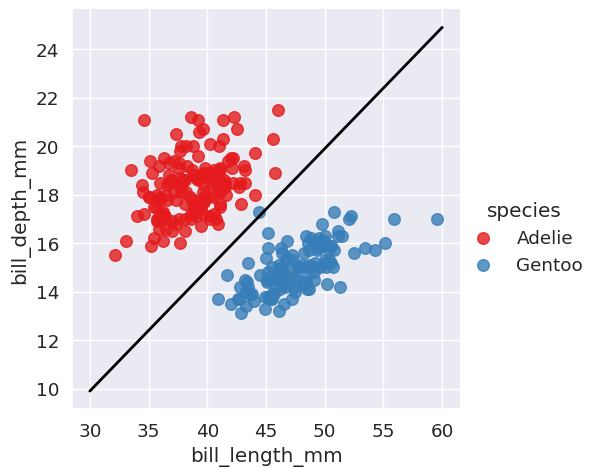

In [ ]:
# Plot the hyperplane
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=filtered_data, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [ ]:
which_specie(50,20)

That's an Adelie Penguin


In [ ]:
# Fit the SVM model & Change C parameter to Higher value
model = svm.SVC(kernel='linear', C=2**5) # "Hard" Margin
model.fit(features, species_label)

SVC(C=32, kernel='linear')

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

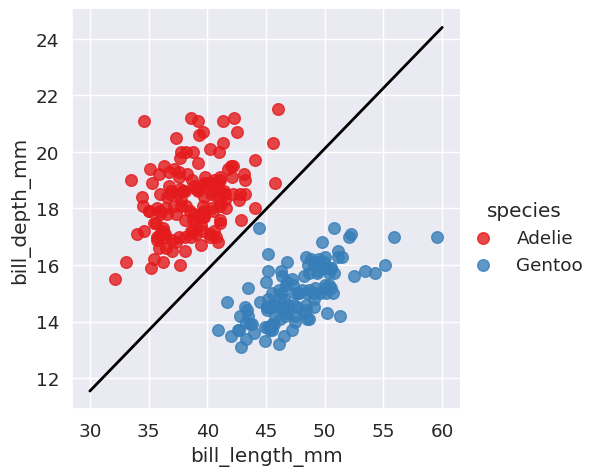

In [ ]:
# Plot the hyperplane
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=filtered_data, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [ ]:
which_specie(50,20)

That's a Gentoo Penguin


## Higher Dimensions

In [ ]:
three_features = filtered_data[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].values
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(three_features, species_label)

SVC(kernel='linear')

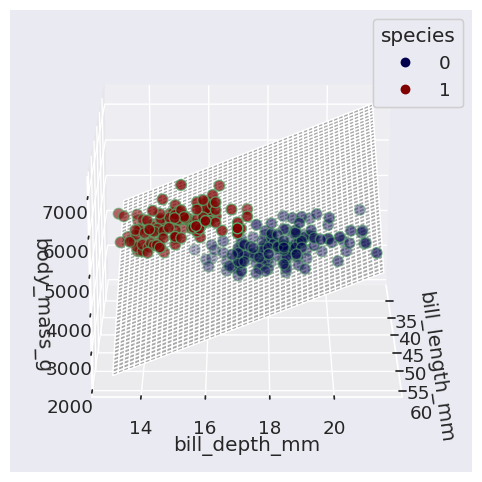

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(three_features[:, 0]), max(three_features[:, 0]), 200)
yy = np.linspace(min(three_features[:, 1]), max(three_features[:, 1]), 200)
xx, yy = np.meshgrid(xx, yy)
zz = (-w[0] * xx - w[1] * yy - model.intercept_[0]) / w[2]

# Plot the separating hyperplane
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

# Plot the data points
scatter = ax.scatter(three_features[:, 0], three_features[:, 1], three_features[:, 2], c=species_label, cmap='seismic', edgecolor='g', s=60)
legend = ax.legend(*scatter.legend_elements(), title="species")
ax.add_artist(legend)

# Set labels
ax.set_xlabel('bill_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('body_mass_g')

# Create multiple static views by rotating the plot
for angle in range(0, 180, 10):
    ax.view_init(elev=20, azim=angle)
    plt.draw()
    plt.pause(0.1)  # Pause to allow the plot to be rendered

plt.show()

In [ ]:
def which_specie(bill_length, bill_depth, body_mass):
  if(model.predict([[bill_length, bill_depth, body_mass]])) == 0:
    print('That\'s an Adelie Penguin')
  else:
    print('That\'s a Gentoo Penguin')

In [ ]:
which_specie(50, 16, 6000)

That's a Gentoo Penguin


In [ ]:
which_specie(45,18,3000)

That's an Adelie Penguin


In [ ]:
which_specie(40, 17, 5000)

That's an Adelie Penguin


## Multi-Class Applications

SVM can be applied for more than 2 classes. Here, all of 3 types of penguins will be classified:

In [ ]:
# Eliminate all None, Inf, NaN values to get a mathematical result
penguin_species = df.dropna()
bill_features = penguin_species[['bill_length_mm', 'bill_depth_mm']].values
all_species = np.where(
    penguin_species['species'] == 'Adelie', 0,
    np.where(penguin_species['species'] == 'Gentoo', 1, 2)
)

# Observe what we got
print(penguin_species)

     Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0             1     Adelie  Torgersen            39.1           18.7   
1             2     Adelie  Torgersen            39.5           17.4   
2             3     Adelie  Torgersen            40.3           18.0   
4             5     Adelie  Torgersen            36.7           19.3   
5             6     Adelie  Torgersen            39.3           20.6   
..          ...        ...        ...             ...            ...   
339         340  Chinstrap      Dream            55.8           19.8   
340         341  Chinstrap      Dream            43.5           18.1   
341         342  Chinstrap      Dream            49.6           18.2   
342         343  Chinstrap      Dream            50.8           19.0   
343         344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       38

In [ ]:
# Fit the SVM model
# Add "decision_function_shape" feature of SVC to make 2+ classification
# one-verseus-rest instead of ovo
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
# put all the penguins inside to the model
model.fit(bill_features, all_species)

SVC(kernel='linear')

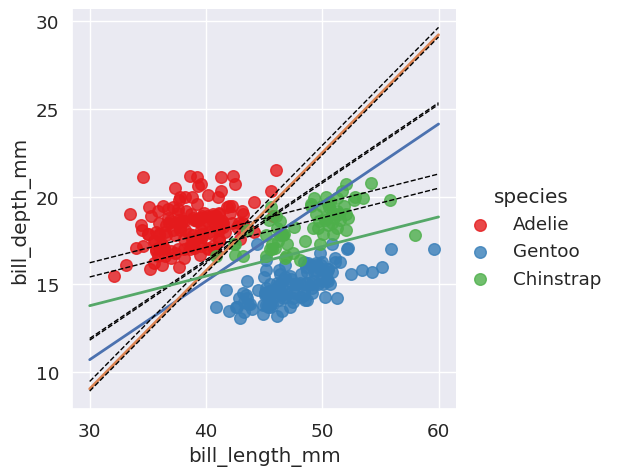

In [ ]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=penguin_species, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

# Get the separating hyperplanes for each class
for i in range(3):
  w = model.coef_[i]  # Get the coefficient vector for class i
  a = -w[0] / w[1]  # Calculate the slope for class i
  xx = np.linspace(30, 60)  # Generate a range of values for the x-axis
  yy = a * xx - (model.intercept_[i]) / w[1]  # Calculate the y-values for the hyperplane of class i

  # Plot the parallels to the separating hyperplane that pass through the support vectors for class i
  b = model.support_vectors_[i]  # Get the support vector for class i
  yy_down = a * xx + (b[1] - a * b[0])  # Calculate the y-value for the upper parallel line
  b = model.support_vectors_[(i + 1) % 3]  # Get the support vector for the next class
  yy_up = a * xx + (b[1] - a * b[0])  # Calculate the y-value for the lower parallel line

  # Plot the hyperplane for class i
  plt.plot(xx, yy, linewidth=2, label=penguin_species['species'].unique()[i])
  plt.plot(xx, yy_down, linewidth=1, color='black', linestyle='--')
  plt.plot(xx, yy_up, linewidth=1, color='black', linestyle='--')

plt.show();

In [ ]:
def which_species(bill_length, bill_depth):
  if(model.predict([[bill_length, bill_depth]])) == 0:
    print('That\'s an Adelie Penguin')
  elif(model.predict([[bill_length, bill_depth]])) == 1:
    print('That\'s a Gentoo Penguin')
  else: print('That\'s a Chinstrap Penguin')

In [ ]:
which_species(50,20)

That's a Chinstrap Penguin


In [ ]:
which_species(50,15)

That's a Gentoo Penguin


In [ ]:
which_species(40,23)

That's an Adelie Penguin


In [ ]:
which_species(45,20)

That's an Adelie Penguin


In [ ]:
which_species(50,23)

That's an Adelie Penguin


## Kernel Trick

In [ ]:
Samplesize = 4
print(df.groupby('species', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:]))

       Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0 143         144     Adelie      Dream            40.7           17.0   
  150         151     Adelie      Dream            36.0           17.1   
  5             6     Adelie  Torgersen            39.3           20.6   
  113         114     Adelie     Biscoe            42.2           19.5   
1 298         299  Chinstrap      Dream            43.2           16.6   
  294         295  Chinstrap      Dream            46.4           18.6   
  309         310  Chinstrap      Dream            51.0           18.8   
  276         277  Chinstrap      Dream            46.5           17.9   
2 174         175     Gentoo     Biscoe            46.5           14.5   
  206         207     Gentoo     Biscoe            46.5           14.4   
  262         263     Gentoo     Biscoe            50.5           15.2   
  245         246     Gentoo     Biscoe            49.5           16.1   

       flipper_length_mm  body_mass_g

In [ ]:
# Identify the type to exclude
type_to_exclude = 'Adelie'

# Create the logical condition
condition = df['species'] != type_to_exclude

# Filter the dataset
filtered_data = df[condition]

# Drop NaN or None or -Inf values
GenChin_data = filtered_data.dropna()

# Print the filtered dataset
print(GenChin_data)

     Unnamed: 0    species  island  bill_length_mm  bill_depth_mm  \
152         153     Gentoo  Biscoe            46.1           13.2   
153         154     Gentoo  Biscoe            50.0           16.3   
154         155     Gentoo  Biscoe            48.7           14.1   
155         156     Gentoo  Biscoe            50.0           15.2   
156         157     Gentoo  Biscoe            47.6           14.5   
..          ...        ...     ...             ...            ...   
339         340  Chinstrap   Dream            55.8           19.8   
340         341  Chinstrap   Dream            43.5           18.1   
341         342  Chinstrap   Dream            49.6           18.2   
342         343  Chinstrap   Dream            50.8           19.0   
343         344  Chinstrap   Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
152              211.0       4500.0  female  2007  
153              230.0       5700.0    male  2007  
154            

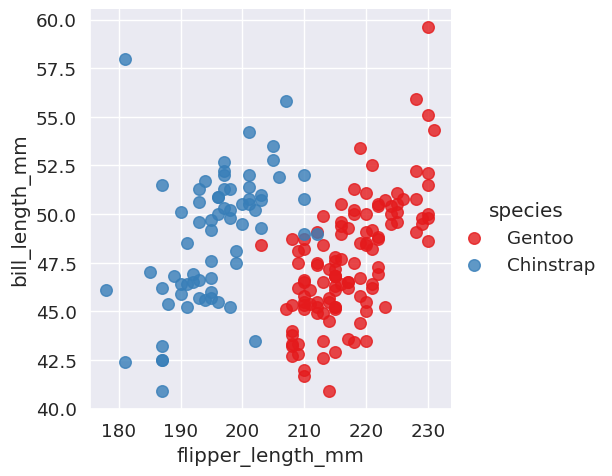

In [ ]:
sns.lmplot(x='flipper_length_mm', y='bill_length_mm', data=GenChin_data, hue='species', palette='Set1', fit_reg=False, scatter_kws={"s":70})